In [1]:
import os
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import xml.etree.ElementTree as ET
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns


In [2]:
def parse_xml(xml_file):
    try:
        tree = ET.parse(xml_file)
        root = tree.getroot()
        # Retrieve all class names from <object> tags
        for obj in root.findall('object'):
            class_name = obj.find('name').text
            if class_name:
                return class_name
        print(f"No class name found in XML: {xml_file}")
        return None
    except Exception as e:
        print(f"Error parsing XML {xml_file}: {e}")
        return None

def load_data(image_dir, xml_dir, class_names):
    images = []
    labels = []
    for class_name in class_names:
        class_folder = os.path.join(image_dir, class_name)
        xml_folder = os.path.join(xml_dir, class_name)
        for img_file in os.listdir(class_folder):
            if img_file.endswith(".jpg"):
                img_path = os.path.join(class_folder, img_file)
                xml_file = os.path.join(xml_folder, img_file.replace(".jpg", ".xml",))
                class_label = parse_xml(xml_file)
                
                # Skip if no valid class label is found
                if class_label is None:
                    print(f"Skipping {img_file} due to missing class label.")
                    continue
                
                # Ensure the class label exists in class_names
                if class_label in class_names:
                    images.append(img_path)
                    labels.append(class_names.index(class_label))
                else:
                    print(f"Warning: {class_label} is not a valid class.")
    return images, labels


No class name found in XML: C:/Users/kaush/Downloads/lips/lips/annotation\inflammed\aug_0_9098.xml
Skipping aug_0_9098.jpg due to missing class label.
Number of images: 596
Number of labels: 596


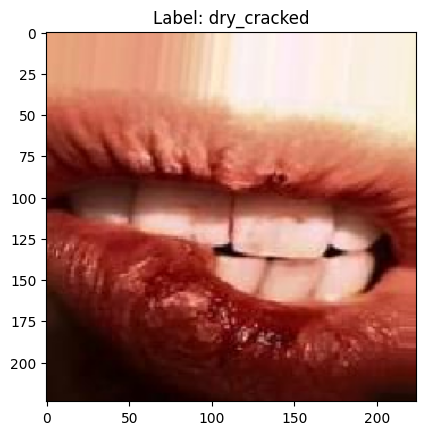

In [3]:
# Preprocess images
def preprocess_images(image_paths, labels, img_size=(224, 224)):
    images = []
    for img_path in image_paths:
        try:
            if not os.path.exists(img_path):
                print(f"Warning: Image path does not exist: {img_path}")
                continue

            img = tf.keras.preprocessing.image.load_img(img_path, target_size=img_size)
            img = tf.keras.preprocessing.image.img_to_array(img)

            if np.all(img == 0):
                print(f"Warning: Image {img_path} is filled with zeros after conversion.")
                continue
            
            images.append(img)
        except Exception as e:
            print(f"Error loading image {img_path}: {e}")
    
    images = np.array(images) / 255.0  # Normalize
    labels = np.array(labels)
    return images, labels

# Define class names
class_names = ["dry_cracked", "inflammed", "pale"]

# Directories for images and annotations
image_dir = "C:/Users/kaush/Downloads/lips/lips/augmented_train"
xml_dir = "C:/Users/kaush/Downloads/lips/lips/annotation"

# Load and preprocess the data
image_paths, labels = load_data(image_dir, xml_dir, class_names)
print(f"Number of images: {len(image_paths)}")
print(f"Number of labels: {len(labels)}")
images, labels = preprocess_images(image_paths, labels)

# Display a sample image
if len(images) > 0:
    plt.imshow(images[0])
    plt.title(f"Label: {class_names[labels[0]]}")
    plt.show()
else:
    print("No images were loaded. Please check the image paths and data.")


Epoch 1/30
16/16 ━━━━━━━━━━━━━━━━━━━━ 35s 2s/step - accuracy: 0.3271 - loss: 1.2994 - val_accuracy: 0.0000e+00 - val_loss: 1.8575
Epoch 2/30
16/16 ━━━━━━━━━━━━━━━━━━━━ 28s 2s/step - accuracy: 0.3917 - loss: 1.2195 - val_accuracy: 0.0000e+00 - val_loss: 1.6854
Epoch 3/30
16/16 ━━━━━━━━━━━━━━━━━━━━ 28s 2s/step - accuracy: 0.3801 - loss: 1.1666 - val_accuracy: 0.0000e+00 - val_loss: 1.6416
Epoch 4/30
16/16 ━━━━━━━━━━━━━━━━━━━━ 29s 2s/step - accuracy: 0.3949 - loss: 1.1639 - val_accuracy: 0.0000e+00 - val_loss: 1.6115
Epoch 5/30
16/16 ━━━━━━━━━━━━━━━━━━━━ 28s 2s/step - accuracy: 0.4439 - loss: 1.0950 - val_accuracy: 0.0000e+00 - val_loss: 1.5790
Epoch 6/30
16/16 ━━━━━━━━━━━━━━━━━━━━ 27s 2s/step - accuracy: 0.4012 - loss: 1.1215 - val_accuracy: 0.0000e+00 - val_loss: 1.5522
Epoch 7/30
16/16 ━━━━━━━━━━━━━━━━━━━━ 27s 2s/step - accuracy: 0.4074 - loss: 1.0994 - val_accuracy: 0.0000e+00 - val_loss: 1.4432
Epoch 8/30
16/16 ━━━━━━━━━━━━━━━━━━━━ 28s 2s/step - accuracy: 0.4321 - loss: 1.0797 - val_

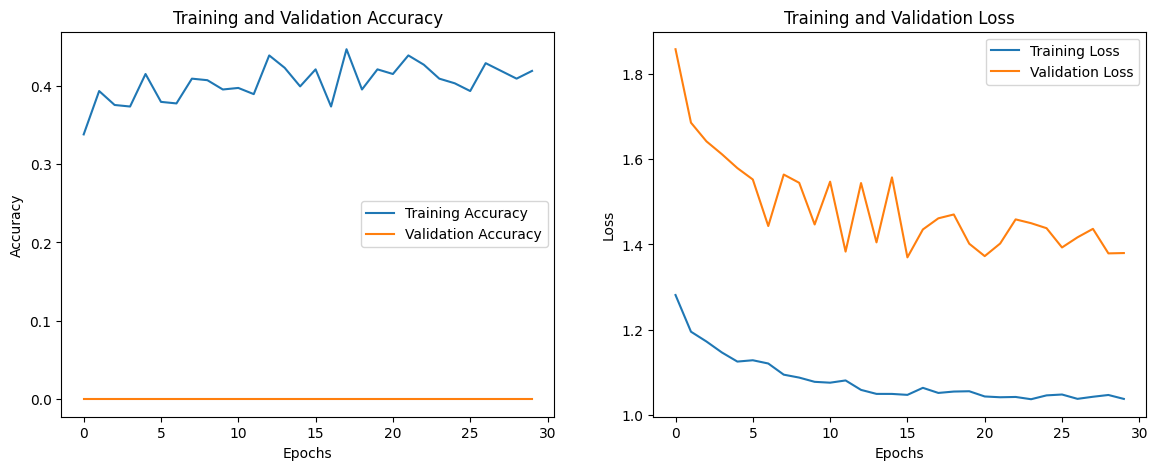

19/19 ━━━━━━━━━━━━━━━━━━━━ 30s 2s/step
              precision    recall  f1-score   support

 dry_cracked       0.35      0.92      0.50       198
   inflammed       0.47      0.16      0.23       198
        pale       0.00      0.00      0.00       200

    accuracy                           0.36       596
   macro avg       0.27      0.36      0.25       596
weighted avg       0.27      0.36      0.25       596



C:\Users\kaush\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\kaush\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\kaush\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} i

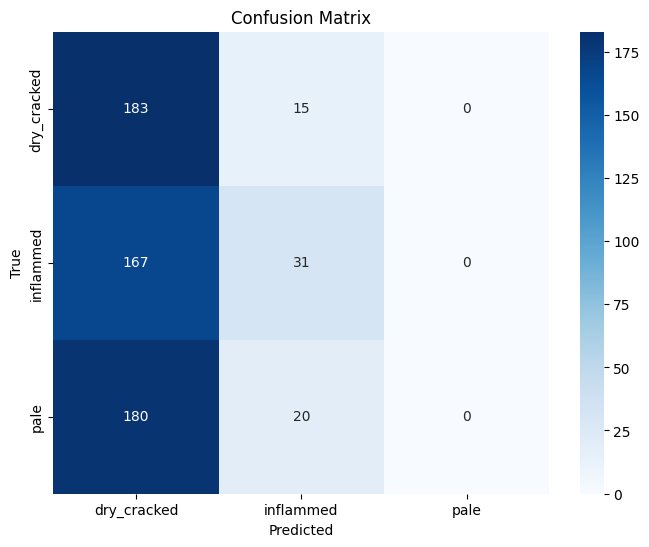

In [4]:
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

# Load ResNet50 model
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freeze the base model layers
for layer in base_model.layers:
    layer.trainable = False

# Add custom classification layers using GlobalAveragePooling2D
x = base_model.output
x = GlobalAveragePooling2D()(x)  # Use GAP instead of Flatten
x = Dense(128, activation='relu')(x)
x = Dropout(0.5)(x)
output = Dense(len(class_names), activation='softmax')(x)

# Build the model
model = Model(inputs=base_model.input, outputs=output)

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.0001),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(images, labels, epochs=30, validation_split=0.15, batch_size=32)

# Plot accuracy and loss
plt.figure(figsize=(14, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()

plt.show()

# Evaluate the model
preds = np.argmax(model.predict(images), axis=1)

# Confusion matrix and classification report
cm = confusion_matrix(labels, preds)
print(classification_report(labels, preds, target_names=class_names))

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=class_names, yticklabels=class_names)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()


Number of test images: 204
Number of test labels: 204


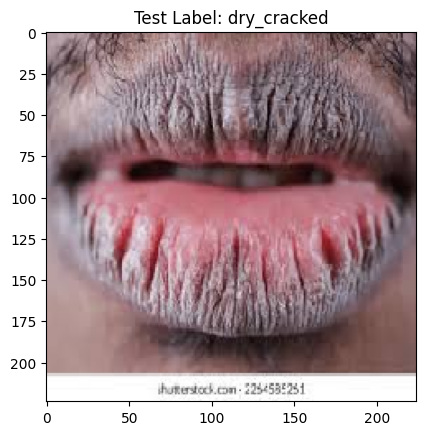

7/7 - 9s - 1s/step - accuracy: 0.4020 - loss: 1.0497
Test Accuracy: 0.40
7/7 ━━━━━━━━━━━━━━━━━━━━ 9s 1s/step

Classification Report:
              precision    recall  f1-score   support

 dry_cracked       0.41      0.91      0.56        79
   inflammed       0.37      0.14      0.20        72
        pale       0.00      0.00      0.00        53

    accuracy                           0.40       204
   macro avg       0.26      0.35      0.25       204
weighted avg       0.29      0.40      0.29       204



C:\Users\kaush\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\kaush\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\kaush\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} i

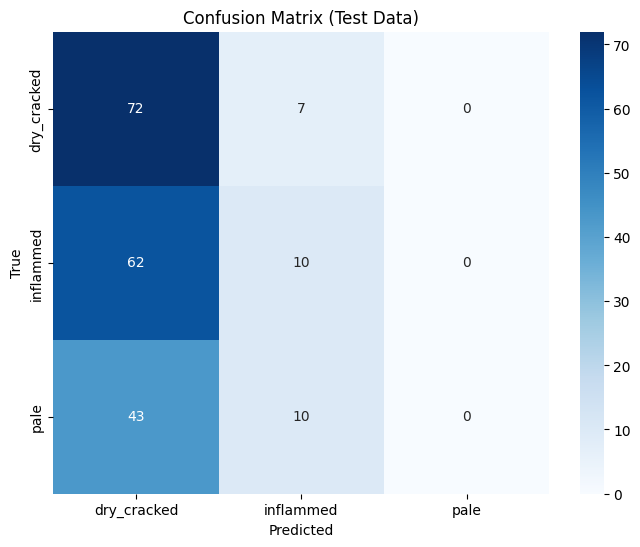

In [5]:
# Path for testing dataset
test_image_dir = "C:/Users/kaush/Downloads/lips/lips/testing"

# Function to preprocess test images
def load_and_preprocess_test_data(image_dir, class_names, img_size=(224, 224)):
    test_images = []
    test_labels = []
    for class_name in class_names:
        class_folder = os.path.join(image_dir, class_name)
        for img_file in os.listdir(class_folder):
            if img_file.endswith(".jpg"):
                img_path = os.path.join(class_folder, img_file)
                try:
                    # Load and preprocess image
                    img = tf.keras.preprocessing.image.load_img(img_path, target_size=img_size)
                    img = tf.keras.preprocessing.image.img_to_array(img)
                    img = img / 255.0  # Normalize
                    test_images.append(img)
                    test_labels.append(class_names.index(class_name))
                except Exception as e:
                    print(f"Error loading image {img_path}: {e}")
    test_images = np.array(test_images)
    test_labels = np.array(test_labels)
    return test_images, test_labels

# Load and preprocess testing data
test_images, test_labels = load_and_preprocess_test_data(test_image_dir, class_names)

# Debug: Check loaded test data
print(f"Number of test images: {len(test_images)}")
print(f"Number of test labels: {len(test_labels)}")

# Ensure data is loaded correctly
if len(test_images) > 0:
    plt.imshow(test_images[0])
    plt.title(f"Test Label: {class_names[test_labels[0]]}")
    plt.show()
else:
    print("No test images were loaded. Please check the test data path.")

# Evaluate model on test data
test_loss, test_accuracy = model.evaluate(test_images, test_labels, verbose=2)
print(f"Test Accuracy: {test_accuracy:.2f}")

# Predictions on test data
test_preds = np.argmax(model.predict(test_images), axis=1)

# Calculate metrics
print("\nClassification Report:")
report = classification_report(test_labels, test_preds, target_names=class_names)
print(report)

# Confusion matrix
cm = confusion_matrix(test_labels, test_preds)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=class_names, yticklabels=class_names)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix (Test Data)")
plt.show()


In [6]:
# Save the model to a file
model.save("annres50_best_model.h5")
